# Objective: 

Let's check how we can read audios and transform them into images:

- About the audio format: After testing, I've decided that the best way to use audios is using a wave format file, because they are easily representable as a chart. Because of that, we will need to transform the `.mp3` files into `.wav`;

# Using ffmpeg

Our project requires that we transform our `.mp3` audios to `.wav`. 

To do that, we chose the pydub lib to do the job. But, this library requires a few other things to work properly, one of them is the ffmpeg, a framework to decode, encode, transcode, mux, demux, stream, filter and play different type of files. 

---

## Using it on Windows
To install it is quite simple, you just need to [download the library](https://www.gyan.dev/ffmpeg/builds/), extract it somewhere easy to find, and add the `bin` folder to your `path`. 

--- 

Also, after reading a bit, I've choosen to use librosa to create the charts. 

In [1]:
from pydub import AudioSegment
from tempfile import mktemp
import matplotlib.pyplot as plt 
import numpy as np
import librosa

mp3_audio = AudioSegment.from_file('example-file.mp3', format="mp3")  # read mp3
audio_file_name = mktemp('.wav')  # use temporary file
mp3_audio.export(audio_file_name, format="wav")  # convert to wav

# Load the audio file
samples, sample_rate = librosa.load(audio_file_name, sr=None)


# Visualizing our data

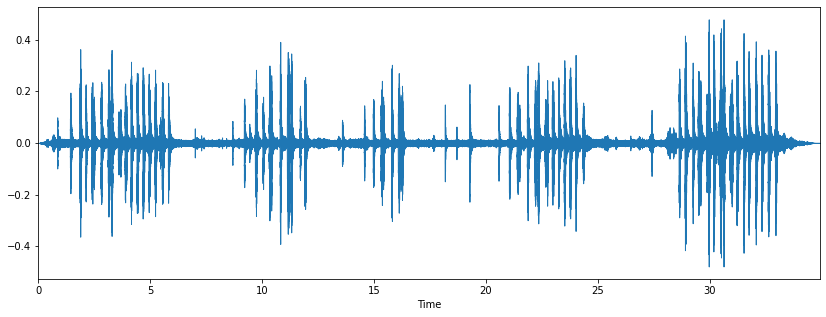

In [3]:
# x-axis has been converted to time using our sample rate. 
# matplotlib plt.plot(y), would output the same figure, but with sample 
# number on the x-axis instead of seconds
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

# Note
The articles says that the best way to represent audio for a machine learning problem is through spectograms, so lets test it

C:\Users\renan\anaconda3\envs\studying\lib\site-packages\librosa\display.py:954: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


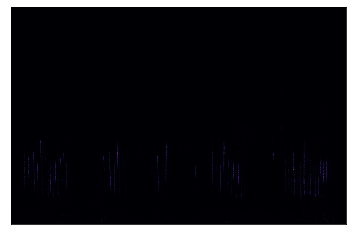

In [7]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

# Mel scale: 
How the human ear works is not linear, it follows a different scale for our perception of pitch and volume. Because of that, it is recommended to use a different scale for our spectograms. You can read more on [this article](https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505#:~:text=We%20can%20see,place%20of%20Frequency).

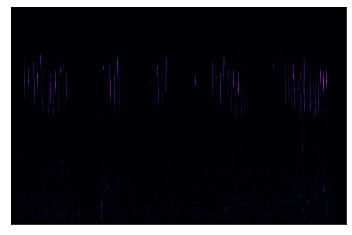

In [8]:
# uses the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

# Note
Our spectogram is still very dark, we need to do some kind of transformation to make the pitches more visible.

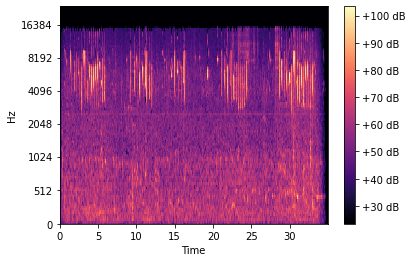

In [9]:
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')